In [5]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from imgaug import augmenters as iaa
import cv2
import random
import math

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pkl.load(f)
with open(validation_file, mode='rb') as f:
    valid = pkl.load(f)
with open(testing_file, mode='rb') as f:
    test = pkl.load(f)

In [3]:
# size ảnh
WIDTH = 32
HEIGHT = 32

In [4]:
X_train = train['features']
y_train = train['labels']

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [6]:
X_valid = valid['features']
y_valid = valid['labels']

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_valid.shape)
print(y_valid.shape)

(4410, 32, 32, 3)
(4410,)


### **Dataset**

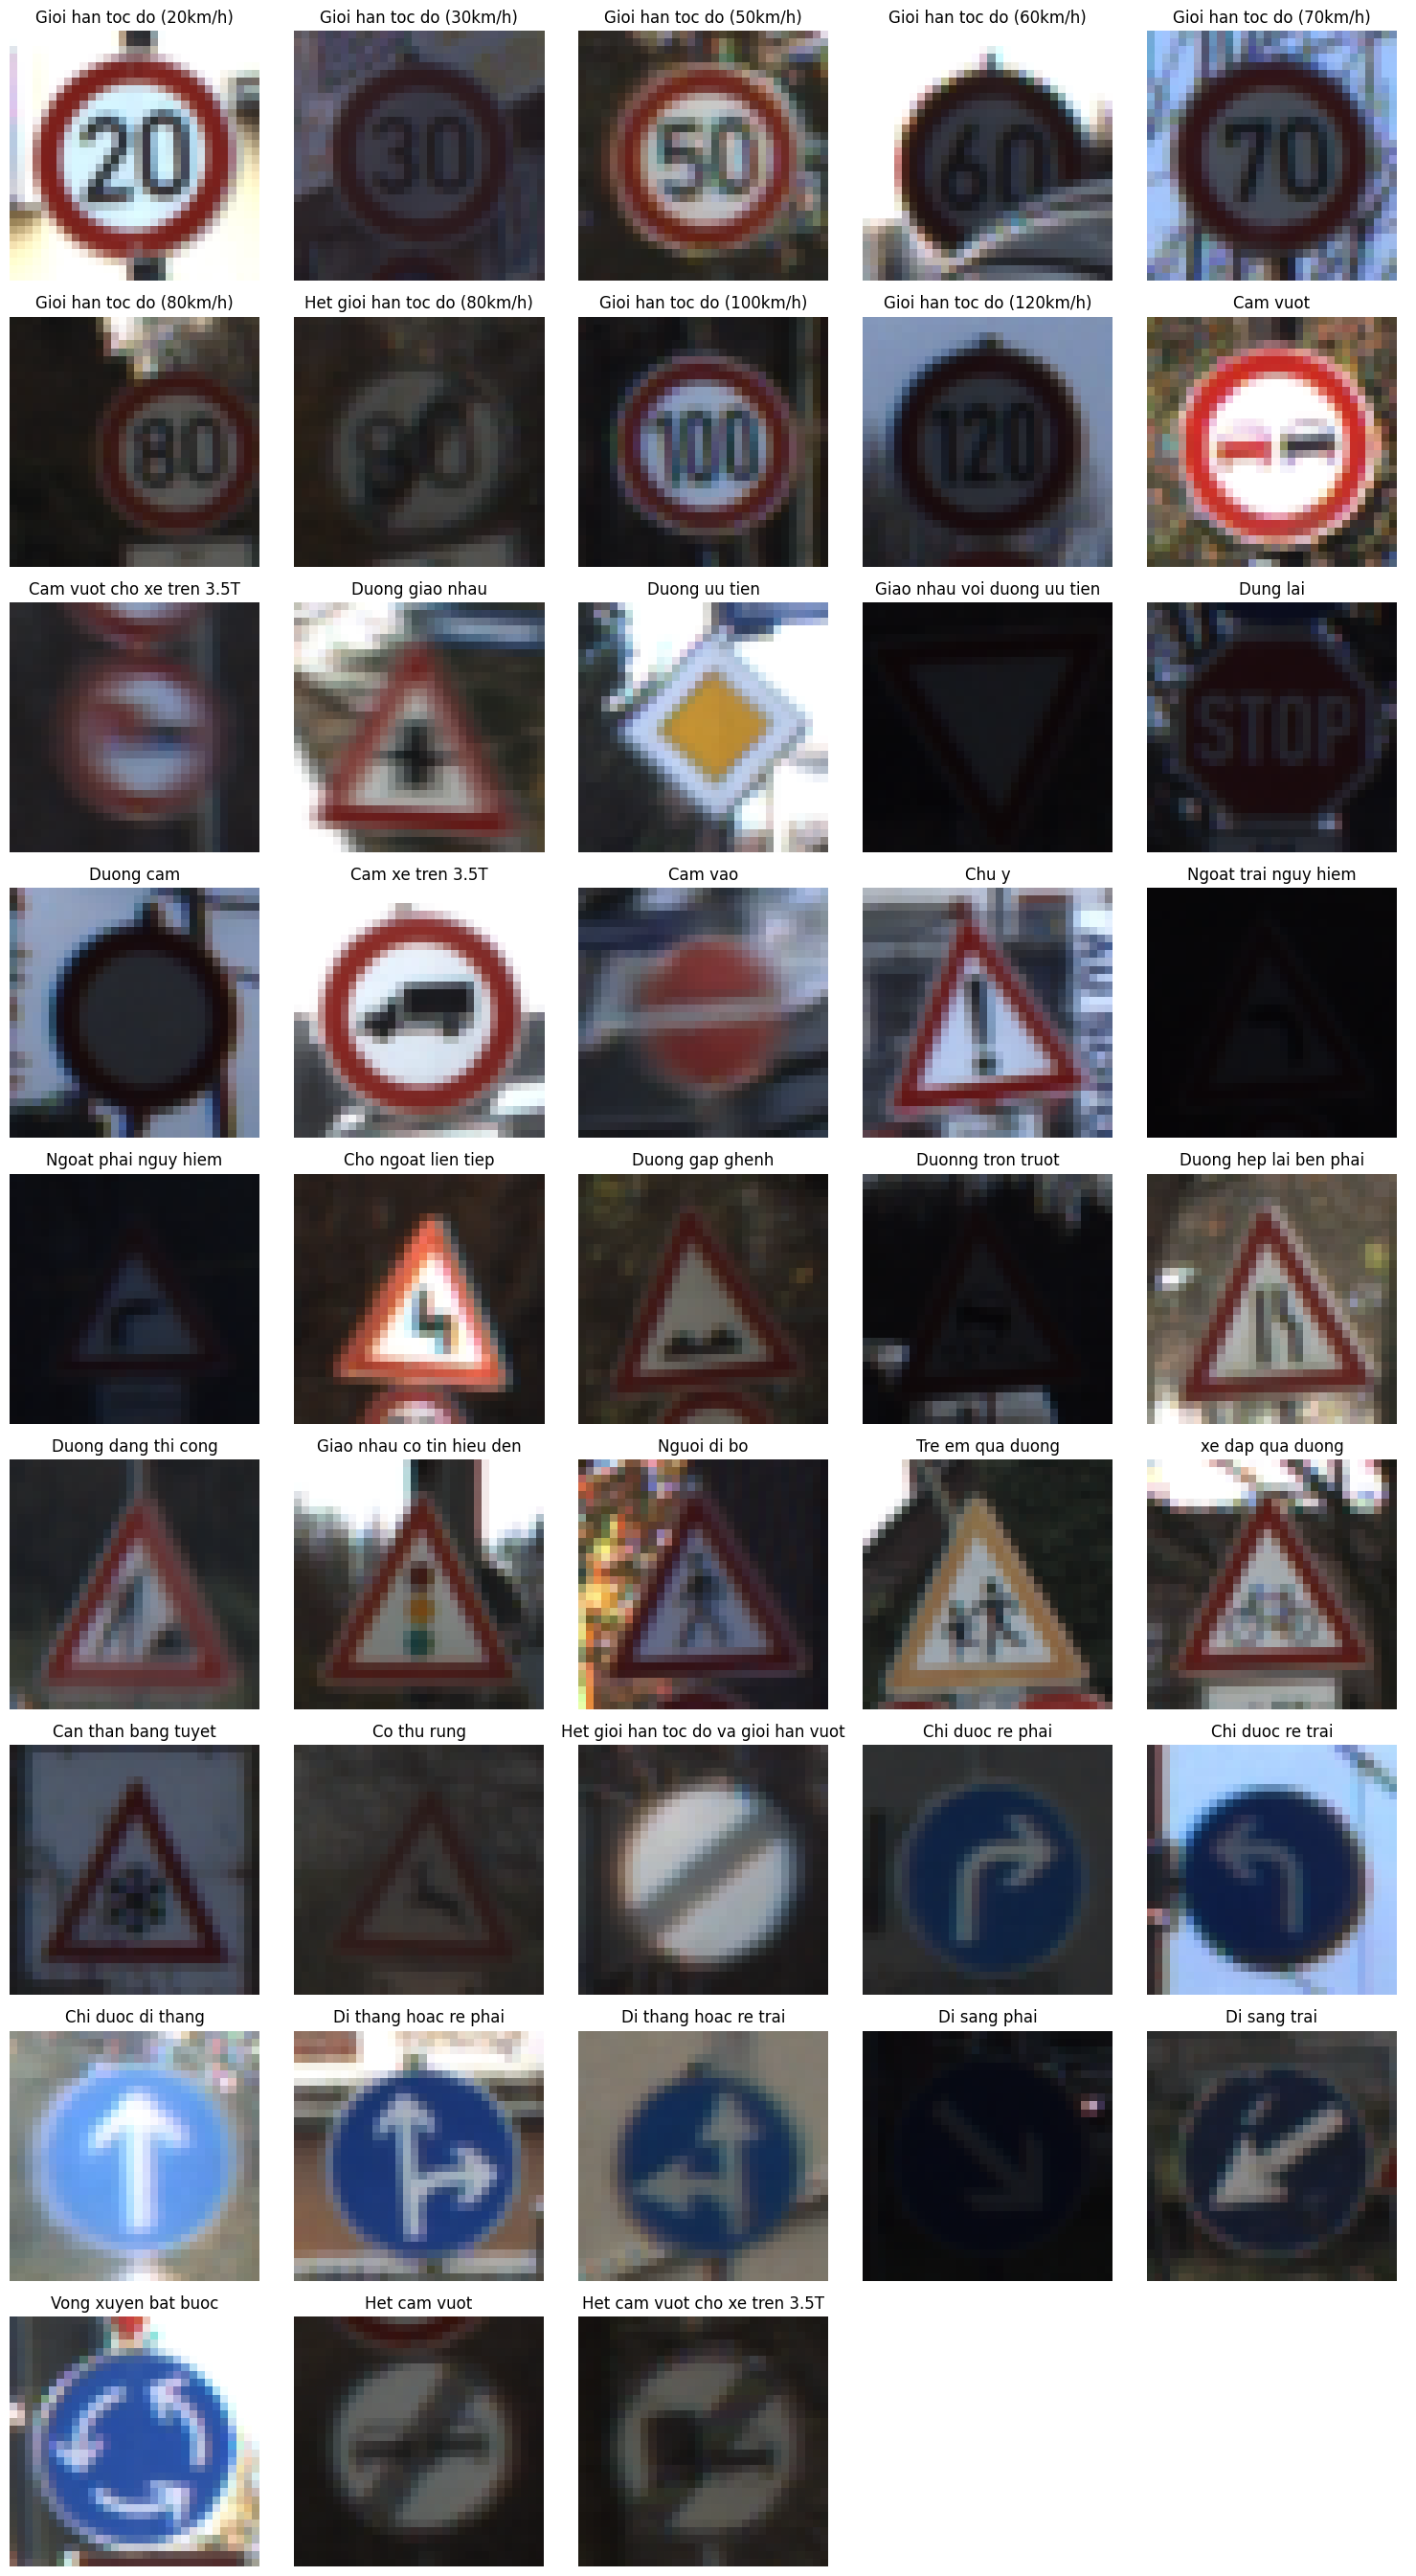

In [6]:
with open("../signs_classes.txt", "r", encoding='utf-8') as f:
    unique_labels = [line.strip() for line in f.readlines()] 

num_rows = math.ceil(len(unique_labels) / 5)  
num_cols = min(5, len(unique_labels))  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

axes = axes.flatten()

for i, label in enumerate(unique_labels):
    index = next(idx for idx, lbl in enumerate(y_train) if lbl == unique_labels.index(label))
    
    axes[i].imshow(X_train[index+20])
    axes[i].set_title(label)
    axes[i].axis('off')  

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


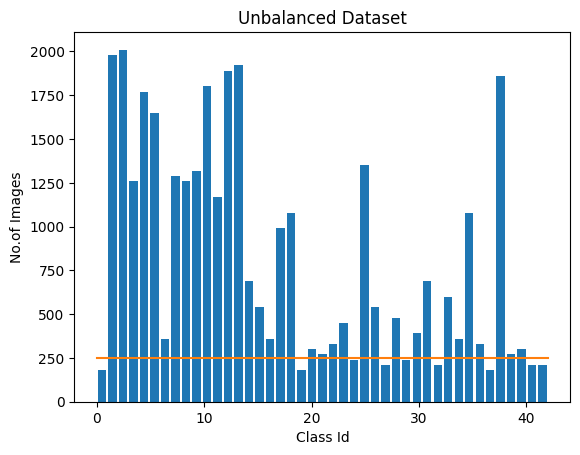

In [7]:
num_bins = 43
samples_per_bin = 250
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.plot((np.min(y_train), np.max(y_train)), (samples_per_bin, samples_per_bin))
plt.title('Unbalanced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

_, bins = np.histogram(y_train, num_bins)

In [8]:
print(bins)

[ 0.          0.97674419  1.95348837  2.93023256  3.90697674  4.88372093
  5.86046512  6.8372093   7.81395349  8.79069767  9.76744186 10.74418605
 11.72093023 12.69767442 13.6744186  14.65116279 15.62790698 16.60465116
 17.58139535 18.55813953 19.53488372 20.51162791 21.48837209 22.46511628
 23.44186047 24.41860465 25.39534884 26.37209302 27.34883721 28.3255814
 29.30232558 30.27906977 31.25581395 32.23255814 33.20930233 34.18604651
 35.1627907  36.13953488 37.11627907 38.09302326 39.06976744 40.04651163
 41.02325581 42.        ]


In [8]:
# Cân bằng dữ liệu
print ('total data:', len(X_train))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(y_train)):
    if y_train[i]>= bins[j] and y_train[i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)

  if len(list_)>samples_per_bin:
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))

X_train = np.delete(X_train, remove_list, axis=0)
print ('remaining images:', len (X_train))

y_train = np.delete(y_train, remove_list, axis=0)
print ('remaining labels:', len (y_train))

total data: 34799
removed: 24439
remaining images: 10360
remaining labels: 10360


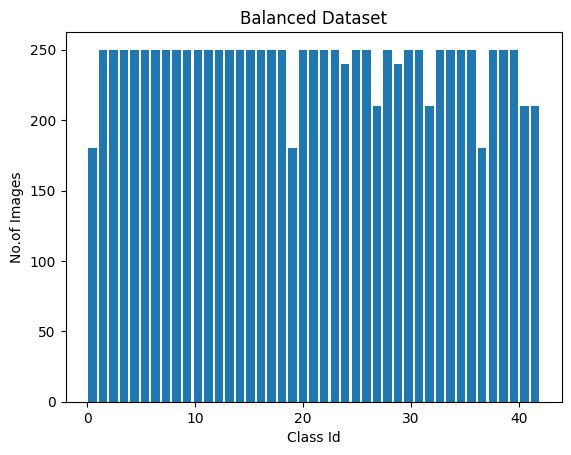

In [ ]:
num_bins = 43
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Balanced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

### **Image Augmentation**

In [11]:
def zoom(image):
  zoom_img = iaa.Affine(scale = (0.9, 1.3))
  image = zoom_img.augment_image(image)
  return image

21


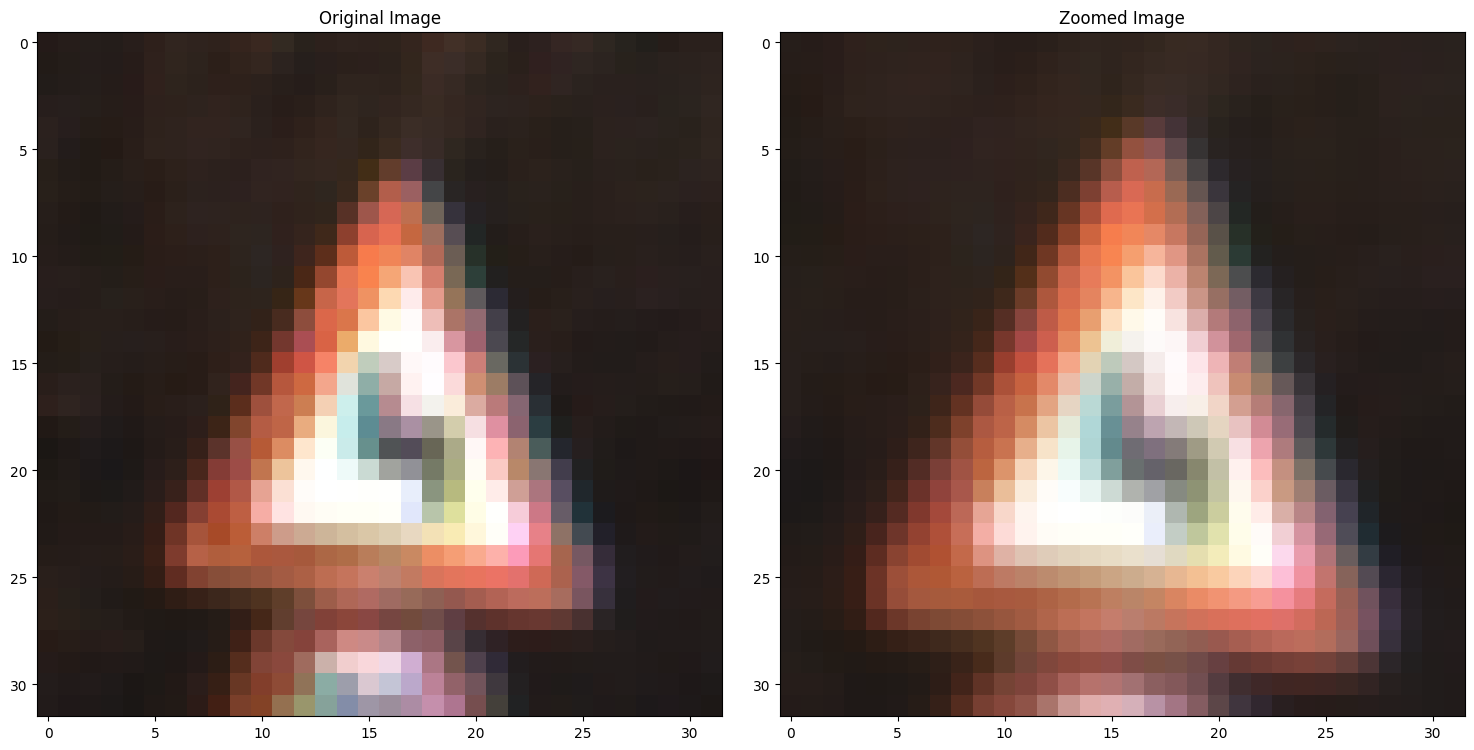

In [12]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
zoomed_image = zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

print(label)

In [13]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

5


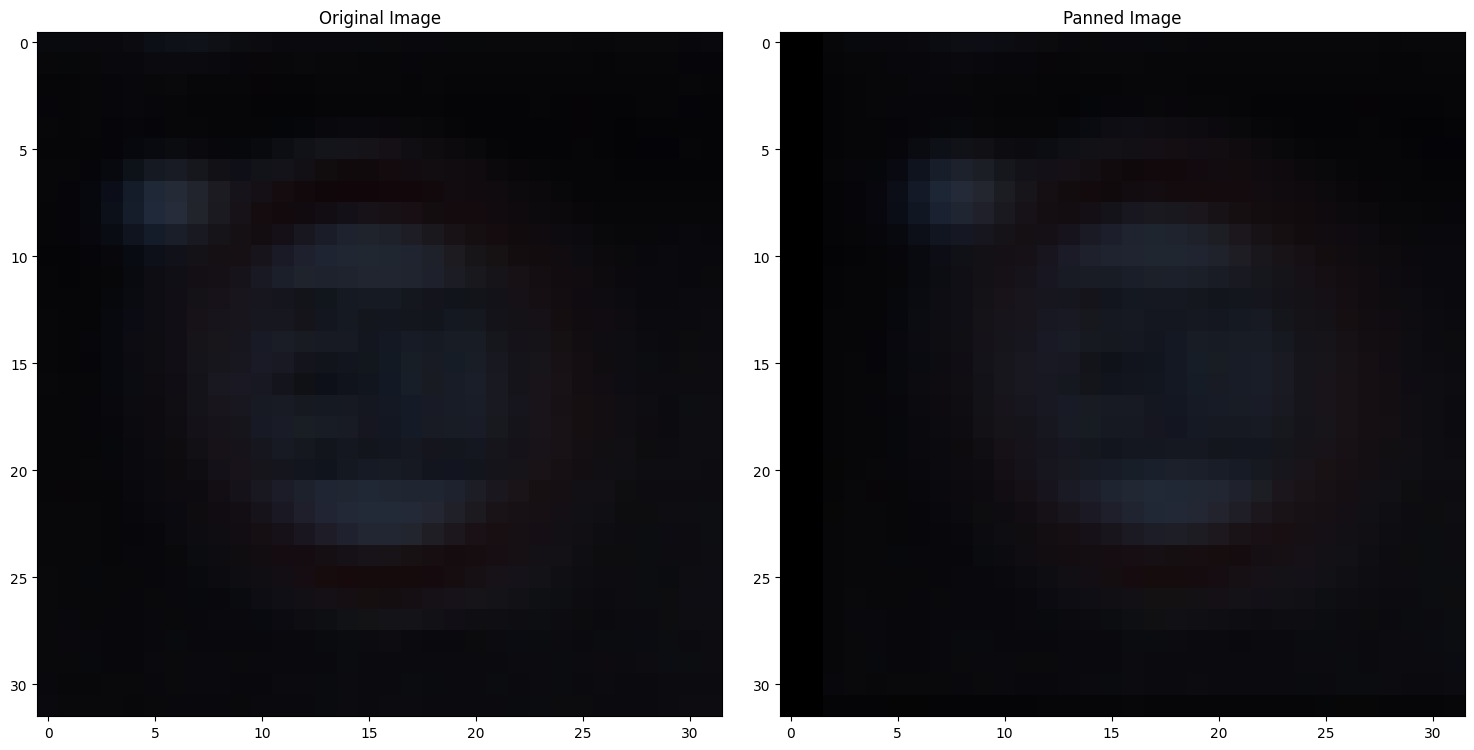

In [14]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
panned_image = pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

print(label)

In [15]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.8))
  image = brightness.augment_image(image)
  return image

17


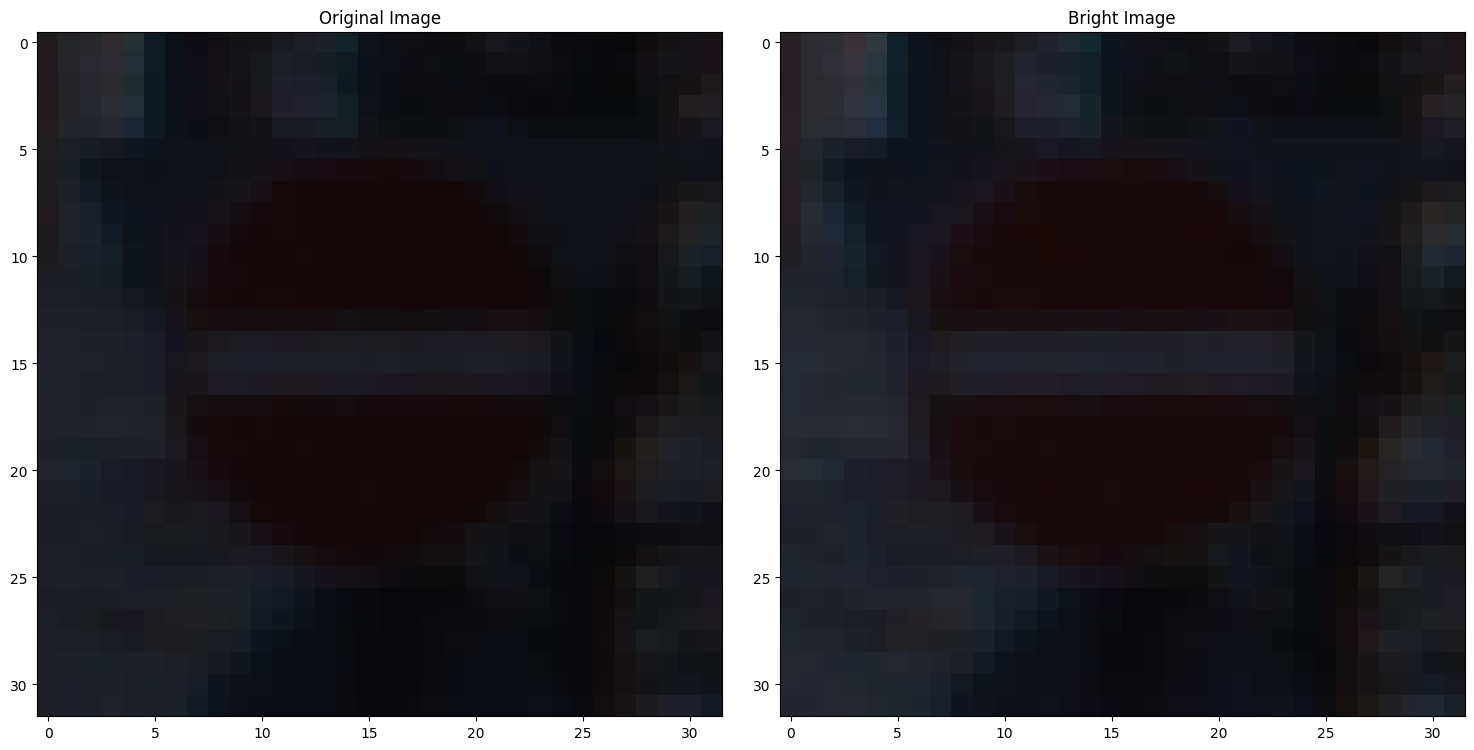

In [16]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Bright Image')

print(label)

In [17]:
augmented_zoom_image = []
augmented_zoom_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  zoomed_img = zoom(img)
  augmented_zoom_image.append(zoomed_img)
  augmented_zoom_label.append(label)

In [18]:
augmented_pan_image = []
augmented_pan_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  panned_img = pan(img)
  augmented_pan_image.append(panned_img)
  augmented_pan_label.append(label)

In [19]:
augmented_bright_image = []
augmented_bright_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  bright_img = img_random_brightness(img)
  augmented_bright_image.append(bright_img)
  augmented_bright_label.append(label)

In [20]:
print('Balanced Dataset Before Augmentation(Image):', X_train.shape)
print('Balanced Dataset Before Augmentation(Label):', y_train.shape)

augmented_zoom_image = np.array(augmented_zoom_image)
augmented_pan_image = np.array(augmented_pan_image)
augmented_bright_image = np.array(augmented_bright_image)
X_train = np.array(X_train)
X_train = np.concatenate((X_train, augmented_zoom_image, augmented_pan_image, augmented_bright_image))


augmented_zoom_label = np.array(augmented_zoom_label) #250
augmented_pan_label = np.array(augmented_pan_label) #250
augmented_bright_label = np.array(augmented_bright_label) #250
y_train = np.array(y_train) #250
y_train = np.concatenate((y_train, augmented_zoom_label, augmented_pan_label, augmented_bright_label))

print('Balanced Dataset After Augmentation(Image):', X_train.shape)
print('Balanced Dataset After Augmentation(Label):', y_train.shape)

Balanced Dataset Before Augmentation(Image): (10360, 32, 32, 3)
Balanced Dataset Before Augmentation(Label): (10360,)
Balanced Dataset After Augmentation(Image): (41440, 32, 32, 3)
Balanced Dataset After Augmentation(Label): (41440,)


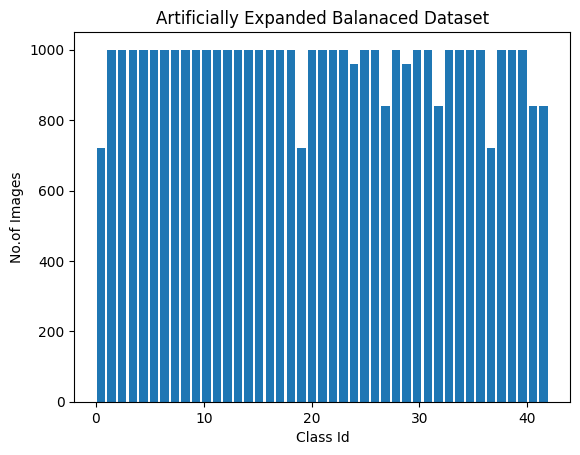

In [21]:
num_bins = 43
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Artificially Expanded Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

### **Xây dựng và huấn luyện mô hình CNN**


In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, Input, BatchNormalization, Activation
from keras.models import Model
import seaborn as sns


In [23]:
def CNN_model():
    model = Sequential()
    model.add(Input(shape=(32, 32, 3)))
    model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Dropout(rate=0.3))

    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization(axis=-1))
    model.add(Dropout(rate=0.3))

    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(43, activation='softmax'))


    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [24]:
model = CNN_model()
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 5, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,761,099 (6.72 MB)

 Trainable params: 1,759,755 (6.71 MB)

 Non-trainable params: 1,344 (5.25 KB)

None


In [25]:
def labels_to_one_hot(y_labels, num_classes):
  matrix_eye = np.eye(num_classes)
  y_labels_array = []
  for i in range(len(y_labels)):
    y_labels_array.append(matrix_eye[:,y_labels[i]])
  return np.array(y_labels_array)

In [26]:
y_train = labels_to_one_hot(y_train, 43)
y_valid = labels_to_one_hot(y_valid, 43)

print(y_train.shape)
print(y_valid.shape)

(41440, 43)
(4410, 43)


In [27]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [28]:
# Huấn luyện  mô hình
with tf.device('/GPU:0'):
    history = model.fit(x=X_train, y=y_train, 
                    batch_size=64, 
                    epochs=20, 
                    verbose=1, 
                    validation_data=(X_valid, y_valid), 
                    shuffle=True)


Epoch 1/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.6085 - loss: 1.5704 - val_accuracy: 0.9615 - val_loss: 0.1629
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9581 - loss: 0.1406 - val_accuracy: 0.9773 - val_loss: 0.1028
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9777 - loss: 0.0733 - val_accuracy: 0.9735 - val_loss: 0.1075
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9863 - loss: 0.0473 - val_accuracy: 0.9857 - val_loss: 0.0770
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9753 - val_loss: 0.0758
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9855 - loss: 0.0433 - val_accuracy: 0.9864 - val_loss: 0.0727
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9901 - loss: 0.0314 - val_accuracy: 0.9721 - val_loss: 0.0881
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 

Text(0.5, 0, 'epoch')

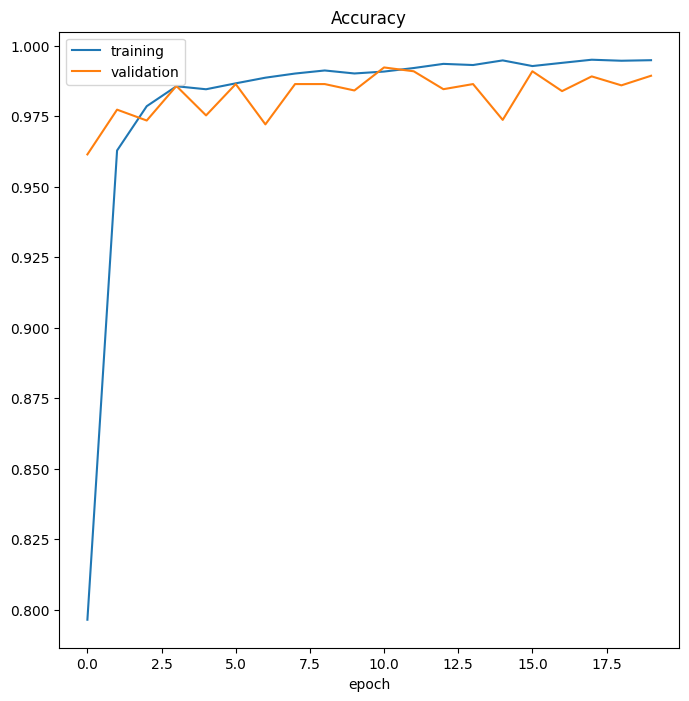

In [29]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

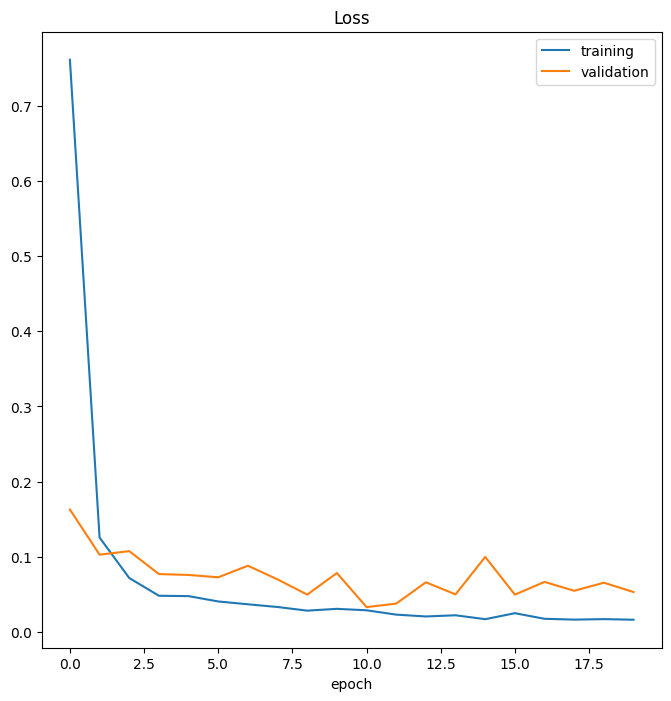

In [30]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [31]:
X_test = test['features']
y_test = test['labels']

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [32]:
y_test = labels_to_one_hot(y_test, 43)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
Image 1
Actual: 17
Prediction: 17
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image 2
Actual: 2
Prediction: 2
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image 3
Actual: 6
Prediction: 6
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image 4
Actual: 26
Prediction: 26
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image 5
Actual: 5
Prediction: 5
--------------------------------------------------


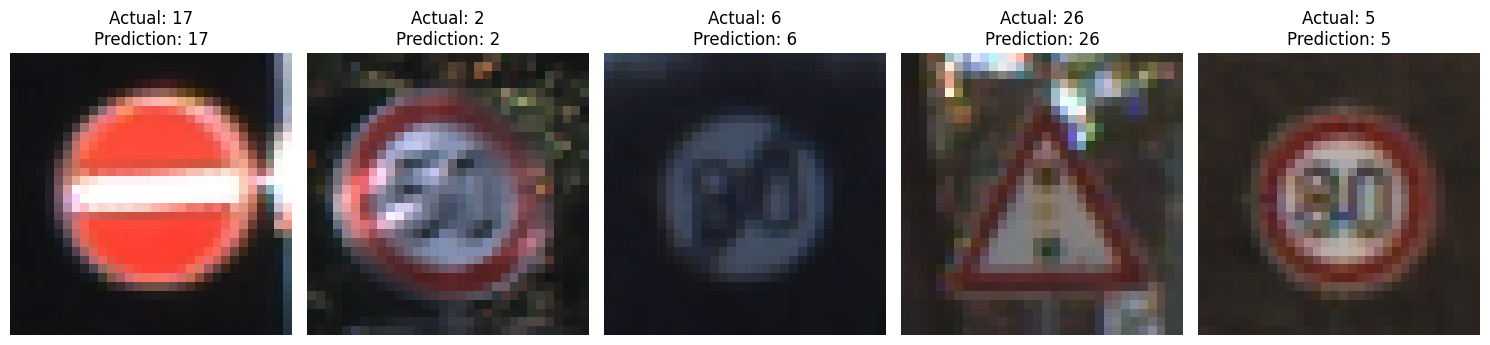

In [34]:
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))  

for i in range(num_samples):
    index = random.randint(0, len(X_test) - 1)  
    img_testing = X_test[index]  
    label_testing = y_test[index]  

    img_testing_reshaped = img_testing.reshape(-1, WIDTH, HEIGHT, 3)  
    prediction = np.argmax(model.predict(img_testing_reshaped))  

    axes[i].imshow(img_testing)
    axes[i].axis('off')  
    axes[i].set_title(f"Actual: {np.argmax(label_testing)}\nPrediction: {prediction}")

    print(f"Image {i+1}")
    print(f"Actual: {np.argmax(label_testing)}")  
    print(f"Prediction: {prediction}")  
    print("-" * 50)  

plt.tight_layout()  
plt.show()


### **Đánh giá và lưu mô hình**

In [35]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9782 - loss: 0.1012
test loss, test acc: [0.08860600739717484, 0.980126678943634]


In [36]:
X_train.shape

(41440, 32, 32, 3)

In [37]:
X_test.shape

(12630, 32, 32, 3)

In [38]:
X_valid.shape

(4410, 32, 32, 3)

In [39]:
y_pred = model.predict(X_test)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix

y_test_classes = np.argmax(y_test, axis=1)

y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99       720
           2       1.00      0.99      0.99       750
           3       1.00      0.92      0.96       450
           4       1.00      0.98      0.99       660
           5       0.93      0.99      0.96       630
           6       0.99      0.94      0.97       150
           7       0.99      1.00      0.99       450
           8       0.98      1.00      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       1.00      0.89      0.94       420
          12       1.00      0.97      0.99       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

Macro Average Precision: 0.9645
Macro Average Recall: 0.9792


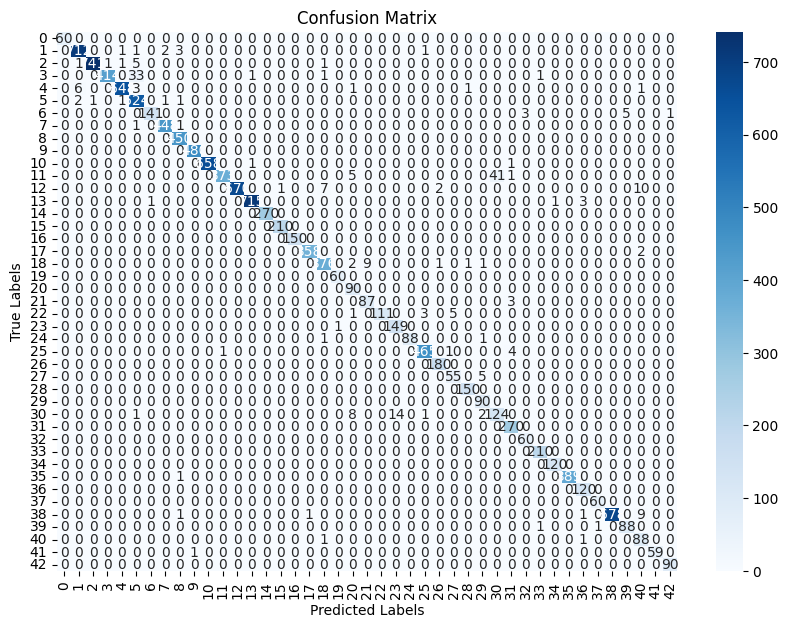

In [41]:
precision = precision_score(y_test_classes, y_pred_classes, average='macro')  
recall = recall_score(y_test_classes, y_pred_classes, average='macro')  

print(f"Macro Average Precision: {precision:.4f}")
print(f"Macro Average Recall: {recall:.4f}")

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(len(cm)), yticklabels=np.arange(len(cm)))
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [42]:
model.save('traffic.h5')